# Fuzzy logika a fuzzy modelování

## Úloha: An air conditioning system with 5-level fuzzy logic system

Obrázek ukazuje klimatizační systém s pětistupňovým fuzzy logickým systémem. Tento systém upravuje teplotu klimatizace porovnáním teploty v mísnosti a cílové hodnoty teploty.

<img src="./imgs/ac_system.webp" alt="Schéma klimatizačního systému" width="600">

Tabulka níže představuje matici hodnto teploty v místnosti proti cílovým hodnotám teploty, které se od klimatizačního systému očekávají. Sada fuzzy pravidel může být vytvořena na základě analýzy dat v této tabulce.

<img src="./imgs/table.webp" alt="Matice hodnot teploty v místnosti proti cílovým hodnotám teploty" width="600">

Hodnota teploty se mění v rozmezí od 0 do 40 stupňů. Výstupní hodnota parametru se mění v rozmezí od -5 (chlazení) do 5 (ohřev). Hodnota nula odpovídá termínu No_Change.

Vytvořte fuzzy logický inferenční model pro řízení klimatizačního systému.

## Postup řešení úlohy

1. Definice fuzzy proměnných:
    * Vstupní proměnné: teplota v místnosti a cílová teplota (rozsah 0-40°C).
    * Výstupní proměnná: příkaz pro klimatizační systém (rozsah -5 až 5).
    * Použití Gaussových příslušnostních funkcí pro všechny proměnné.
2. Definice pravidel fuzzy logiky:
    * Matice pravidel je stanovena na základě vztahů mezi vstupy a výstupy.
    * Definování pravidel pro každý kombinovaný stav teploty v místnosti a cílové teploty.
    * Například: Pokud je teplota v místnosti velmi studená a cílová teplota teplá, systém začne ohřívat.
3. Implementace modelu:
    * Implementace fuzzy inferenčního systému v Pythonu pomocí knihovny skfuzzy.
    * Definování proměnných, příslušnostních funkcí a pravidel.
    * Vytvoření řídicího systému a testování na různých vstupních hodnotách.
4. Testování modelu:
    * Použití různých kombinací vstupních hodnot pro ověření správnosti výstupu.
    * Příklad: pokud je teplota v místnosti 30°C a cílová teplota 20°C, očekává se výstupní hodnota "Cool".
    * Porovnání reálných výsledků s očekávanými výstupy.
5. Vizualizace výsledků:
    * Vytvoření 3D grafu zobrazujícího závilost mezi vstupy a výstupem.
    * Osy grafu: teplota v místnosti, cílová teplota, příkaz pro klimatizaci.
    * Použití barevné škály k zobrazení intenzity výstupní hodnoty.

### Import knihoven a konfigurace

In [1]:
# Import knihoven
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Konfigurace pro lepší zobrazení grafů
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Konfigurace pro Jupyter notebook
%matplotlib inline


### 1. Definice fuzzy proměnných

Definujeme vstupní a výstupní proměnné s jejich univerzy hodnot.

In [2]:
# Definice fuzzy proměnných
room_temp = ctrl.Antecedent(np.arange(0, 41, 0.1), 'room_temp')
target_temp = ctrl.Antecedent(np.arange(0, 41, 0.1), 'target_temp')
ac_command = ctrl.Consequent(np.arange(-5, 5.01, 0.01), 'ac_command')

# Parametry pro Gaussovy funkce (střed, směrodatná odchylka)
temp_params = {
    'very_cold': (5, 3),
    'cold': (12, 3),
    'warm': (20, 4),
    'hot': (28, 3),
    'very_hot': (35, 3)
}

command_params = {
    'cool': (-3, 1.5),
    'no_change': (0, 1.5),
    'heat': (3, 1.5)
}


### 2. Definice příslušnostních funkcí

Používáme Gaussovy příslušnostní funkce pro všechny proměnné.

In [3]:
# Definice Gaussových příslušnostních funkcí pro teplotu v místnosti
for label, (center, sigma) in temp_params.items():
    room_temp[label] = fuzz.gaussmf(room_temp.universe, center, sigma)

# Definice Gaussových příslušnostních funkcí pro cílovou teplotu
for label, (center, sigma) in temp_params.items():
    target_temp[label] = fuzz.gaussmf(target_temp.universe, center, sigma)

# Definice příslušnostních funkcí pro příkazy klimatizace
for label, (center, sigma) in command_params.items():
    ac_command[label] = fuzz.gaussmf(ac_command.universe, center, sigma)


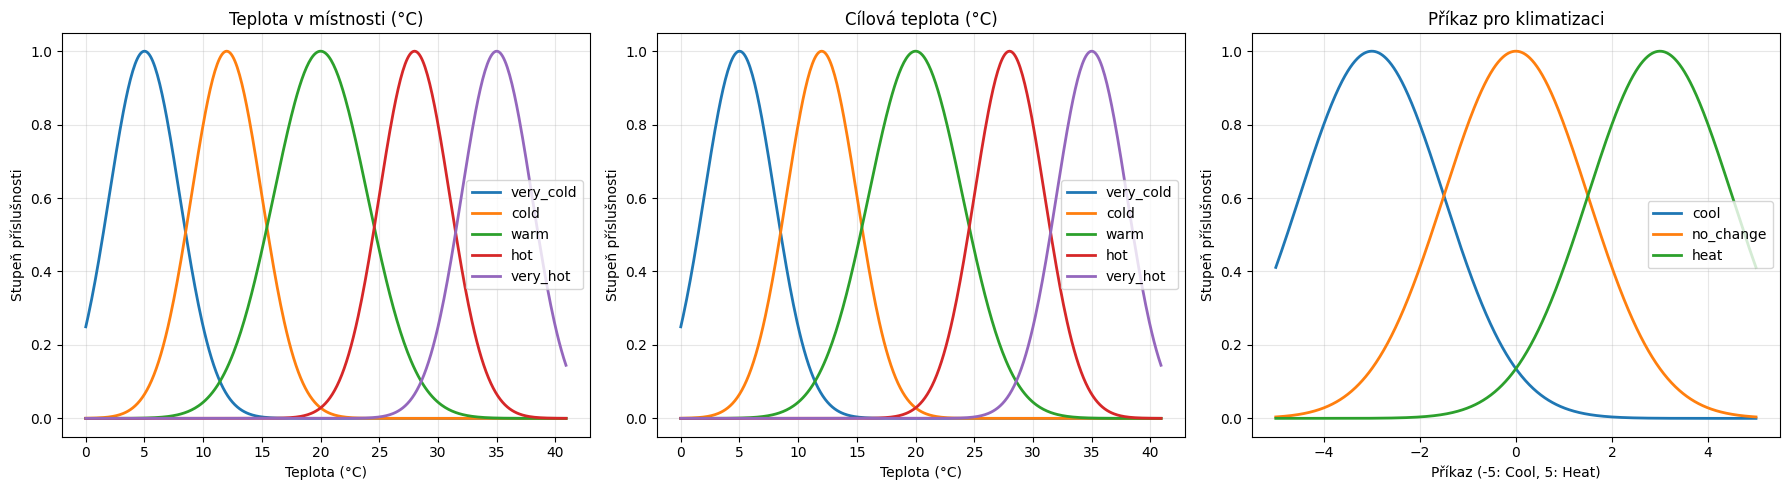

In [4]:
# Vizualizace příslušnostních funkcí
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Vizualizace teploty v místnosti
for label in temp_params.keys():
    axes[0].plot(room_temp.universe, room_temp[label].mf, label=label, linewidth=2)
axes[0].set_title('Teplota v místnosti (°C)')
axes[0].set_xlabel('Teplota (°C)')
axes[0].set_ylabel('Stupeň příslušnosti')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Vizualizace cílové teploty
for label in temp_params.keys():
    axes[1].plot(target_temp.universe, target_temp[label].mf, label=label, linewidth=2)
axes[1].set_title('Cílová teplota (°C)')
axes[1].set_xlabel('Teplota (°C)')
axes[1].set_ylabel('Stupeň příslušnosti')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Vizualizace příkazů klimatizace
for label in command_params.keys():
    axes[2].plot(ac_command.universe, ac_command[label].mf, label=label, linewidth=2)
axes[2].set_title('Příkaz pro klimatizaci')
axes[2].set_xlabel('Příkaz (-5: Cool, 5: Heat)')
axes[2].set_ylabel('Stupeň příslušnosti')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 3. Definice pravidel fuzzy logiky

Pravidla jsou definována na základě matice hodnot z tabulky.
Implementujeme systematický přístup pro definici všech 25 pravidel.

In [5]:
# Definice matice pravidel (room_temp vs target_temp)
rule_matrix = {
    ('very_cold', 'very_cold'): 'no_change',
    ('very_cold', 'cold'): 'heat',
    ('very_cold', 'warm'): 'heat',
    ('very_cold', 'hot'): 'heat',
    ('very_cold', 'very_hot'): 'heat',
    
    ('cold', 'very_cold'): 'cool',
    ('cold', 'cold'): 'no_change',
    ('cold', 'warm'): 'heat',
    ('cold', 'hot'): 'heat',
    ('cold', 'very_hot'): 'heat',
    
    ('warm', 'very_cold'): 'cool',
    ('warm', 'cold'): 'cool',
    ('warm', 'warm'): 'no_change',
    ('warm', 'hot'): 'heat',
    ('warm', 'very_hot'): 'heat',
    
    ('hot', 'very_cold'): 'cool',
    ('hot', 'cold'): 'cool',
    ('hot', 'warm'): 'cool',
    ('hot', 'hot'): 'no_change',
    ('hot', 'very_hot'): 'heat',
    
    ('very_hot', 'very_cold'): 'cool',
    ('very_hot', 'cold'): 'cool',
    ('very_hot', 'warm'): 'cool',
    ('very_hot', 'hot'): 'cool',
    ('very_hot', 'very_hot'): 'no_change'
}


In [6]:
# Vytvoření pravidel automaticky z matice
rules = []
rule_counter = 1

for (room_state, target_state), command_state in rule_matrix.items():
    rule = ctrl.Rule(room_temp[room_state] & target_temp[target_state], 
                     ac_command[command_state])
    rules.append(rule)
    print(f"Pravidlo {rule_counter}: IF room_temp is {room_state} AND target_temp is {target_state} THEN command is {command_state}")
    rule_counter += 1

print(f"\nCelkem definováno {len(rules)} pravidel.")


Pravidlo 1: IF room_temp is very_cold AND target_temp is very_cold THEN command is no_change
Pravidlo 2: IF room_temp is very_cold AND target_temp is cold THEN command is heat
Pravidlo 3: IF room_temp is very_cold AND target_temp is warm THEN command is heat
Pravidlo 4: IF room_temp is very_cold AND target_temp is hot THEN command is heat
Pravidlo 5: IF room_temp is very_cold AND target_temp is very_hot THEN command is heat
Pravidlo 6: IF room_temp is cold AND target_temp is very_cold THEN command is cool
Pravidlo 7: IF room_temp is cold AND target_temp is cold THEN command is no_change
Pravidlo 8: IF room_temp is cold AND target_temp is warm THEN command is heat
Pravidlo 9: IF room_temp is cold AND target_temp is hot THEN command is heat
Pravidlo 10: IF room_temp is cold AND target_temp is very_hot THEN command is heat
Pravidlo 11: IF room_temp is warm AND target_temp is very_cold THEN command is cool
Pravidlo 12: IF room_temp is warm AND target_temp is cold THEN command is cool
Pravi

### 4. Implementace a testování modelu

Vytvoříme řídicí systém a otestujeme jej na různých vstupních hodnotách.

In [7]:
# Vytvoření řídicího systému
climate_control = ctrl.ControlSystem(rules)
climate_sim = ctrl.ControlSystemSimulation(climate_control)


In [8]:
# Vytvoření funkce pro testování
def test_system(room_temperature, target_temperature):
    """
    Testuje fuzzy systém pro zadané vstupní hodnoty.
    
    Args:
        room_temperature (float): Teplota v místnosti (0-40°C)
        target_temperature (float): Cílová teplota (0-40°C)
    
    Returns:
        float: Výstupní příkaz pro klimatizaci (-5 až 5)
    """
    climate_sim.input['room_temp'] = room_temperature
    climate_sim.input['target_temp'] = target_temperature
    climate_sim.compute()
    
    command_value = climate_sim.output['ac_command']
    
    # Interpretace výstupu
    if command_value < -1:
        action = "COOL (Chlazení)"
    elif command_value > 1:
        action = "HEAT (Ohřev)"
    else:
        action = "NO_CHANGE (Bez změny)"
    
    print(f"Vstup: Room={room_temperature}°C, Target={target_temperature}°C")
    print(f"Výstup: {command_value:.2f} -> {action}")
    print("-" * 50)
    
    return command_value


In [9]:
# Testování
print("=== TESTOVÁNÍ MODELU ===\n")

test_cases = [
    (12, 20),   # Studeno -> Teplo (očekáváme HEAT)
    (30, 20),   # Horko -> Teplo (očekáváme COOL)
    (20, 20),   # Teplo -> Teplo (očekáváme NO_CHANGE)
    (5, 35),    # Velmi studeno -> Velmi horko (očekáváme HEAT)
    (35, 10),   # Velmi horko -> Studeno (očekáváme COOL)
    (25, 22),   # Mírné rozdíly
    (18, 25),   # Ohřev potřebný
    (28, 15)    # Chlazení potřebné
]

results = []
for room, target in test_cases:
    result = test_system(room, target)
    results.append((room, target, result))


=== TESTOVÁNÍ MODELU ===

Vstup: Room=12°C, Target=20°C
Výstup: 2.19 -> HEAT (Ohřev)
--------------------------------------------------
Vstup: Room=30°C, Target=20°C
Výstup: -2.46 -> COOL (Chlazení)
--------------------------------------------------
Vstup: Room=20°C, Target=20°C
Výstup: -0.00 -> NO_CHANGE (Bez změny)
--------------------------------------------------
Vstup: Room=5°C, Target=35°C
Výstup: 2.73 -> HEAT (Ohřev)
--------------------------------------------------
Vstup: Room=35°C, Target=10°C
Výstup: -2.70 -> COOL (Chlazení)
--------------------------------------------------
Vstup: Room=25°C, Target=22°C
Výstup: -1.09 -> COOL (Chlazení)
--------------------------------------------------
Vstup: Room=18°C, Target=25°C
Výstup: 1.33 -> HEAT (Ohřev)
--------------------------------------------------
Vstup: Room=28°C, Target=15°C
Výstup: -2.03 -> COOL (Chlazení)
--------------------------------------------------


### 5. Vizualizace výsledků

Vytvoříme 3D graf zobrazující závislost mezi vstupy a výstupem.

In [10]:
def create_3d_surface():
    """
    Vytvoří 3D povrchový graf fuzzy systému.
    """
    # Vytvoření mřížky hodnot
    room_values = np.linspace(0, 40, 25)
    target_values = np.linspace(0, 40, 25)
    room_grid, target_grid = np.meshgrid(room_values, target_values)
    
    # Výpočet výstupních hodnot
    command_grid = np.zeros_like(room_grid)
    
    print("Generování dat pro 3D vizualizaci...")
    total_points = room_grid.shape[0] * room_grid.shape[1]
    current_point = 0
    
    for i in range(room_grid.shape[0]):
        for j in range(room_grid.shape[1]):
            try:
                climate_sim.input['room_temp'] = room_grid[i, j]
                climate_sim.input['target_temp'] = target_grid[i, j]
                climate_sim.compute()
                command_grid[i, j] = climate_sim.output['ac_command']
            except:
                command_grid[i, j] = 0  # Fallback hodnota
            
            current_point += 1
            if current_point % 50 == 0:
                print(f"Zpracováno {current_point}/{total_points} bodů")
    
    return room_grid, target_grid, command_grid


Generování dat pro 3D vizualizaci...
Zpracováno 50/625 bodů
Zpracováno 100/625 bodů
Zpracováno 150/625 bodů
Zpracováno 200/625 bodů
Zpracováno 250/625 bodů
Zpracováno 300/625 bodů
Zpracováno 350/625 bodů
Zpracováno 400/625 bodů
Zpracováno 450/625 bodů
Zpracováno 500/625 bodů
Zpracováno 550/625 bodů
Zpracováno 600/625 bodů


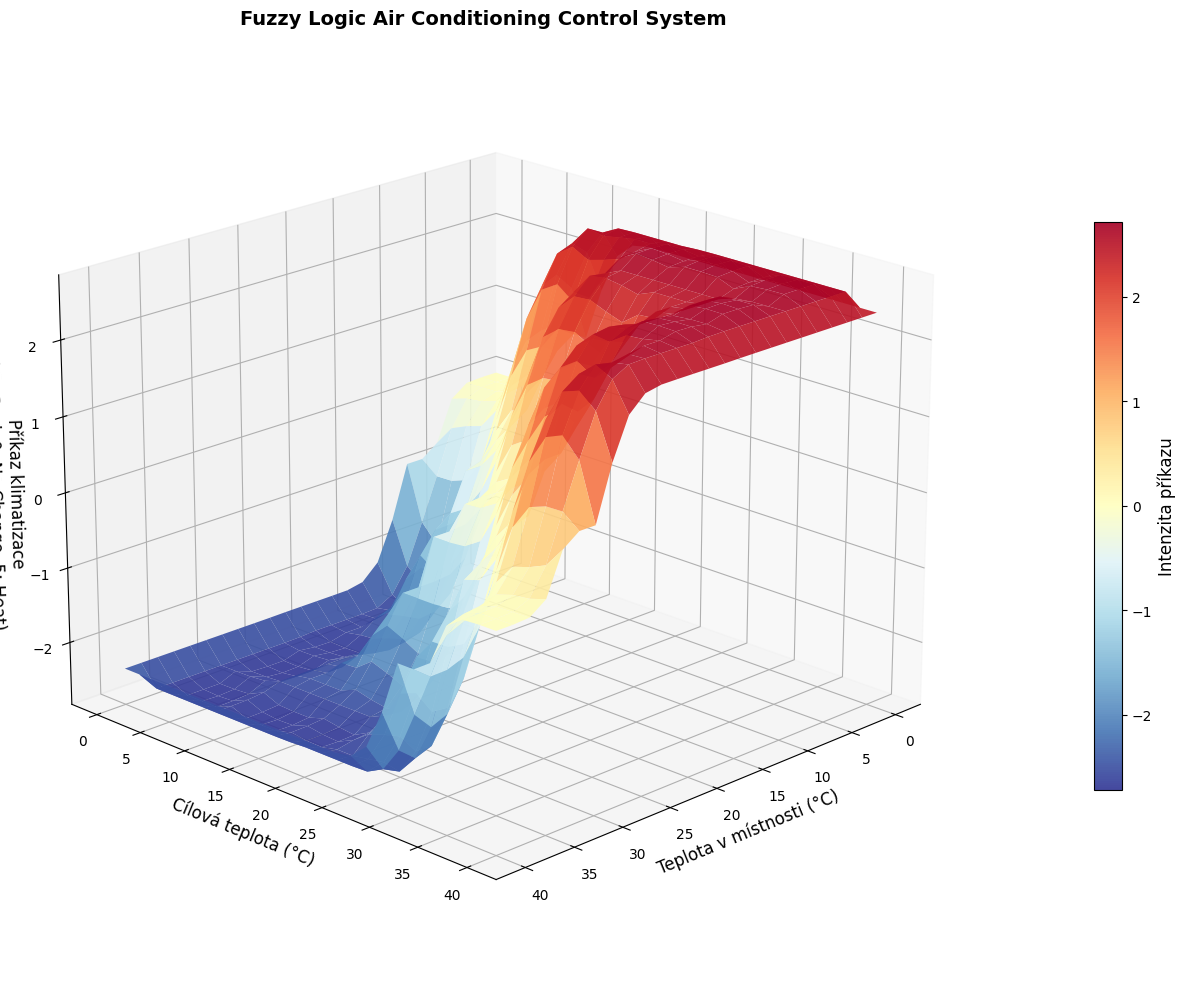

In [11]:
# Generování dat pro vizualizaci
room_grid, target_grid, command_grid = create_3d_surface()

# Vytvoření 3D grafu
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Povrchový graf s barevnou mapou
surf = ax.plot_surface(room_grid, target_grid, command_grid, 
                      cmap='RdYlBu_r', alpha=0.9, edgecolor='none')

# Nastavení os a popisků
ax.set_xlabel('Teplota v místnosti (°C)', fontsize=12)
ax.set_ylabel('Cílová teplota (°C)', fontsize=12)
ax.set_zlabel('Příkaz klimatizace\n(-5: Cool, 0: No Change, 5: Heat)', 
              fontsize=12)
ax.set_title('Fuzzy Logic Air Conditioning Control System', 
             fontsize=14, fontweight='bold')

# Barevná škála
cbar = fig.colorbar(surf, shrink=0.6, aspect=20, pad=0.1)
cbar.set_label('Intenzita příkazu', fontsize=12)

# Nastavení pohledu
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()


### 6. Analýza a ověření modelu

Provedeme dodatečnou analýzu modelu pro ověření jeho správnosti.

In [12]:
def analyze_model():
    """
    Analyzuje chování modelu a vytvoří 2D heatmapu.
    """
    # Vytvoření heatmapy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Heatmapa výstupních hodnot
    im1 = ax1.imshow(command_grid, extent=[0, 40, 0, 40], 
                     origin='lower', cmap='RdYlBu_r', aspect='auto')
    ax1.set_xlabel('Cílová teplota (°C)')
    ax1.set_ylabel('Teplota v místnosti (°C)')
    ax1.set_title('Heatmapa: Příkazy klimatizace')
    
    # Přidání barevné škály
    cbar1 = plt.colorbar(im1, ax=ax1)
    cbar1.set_label('Příkaz (-5: Cool, 5: Heat)')
    
    # Kontourový graf
    contour = ax2.contour(target_grid, room_grid, command_grid, 
                         levels=15, colors='black', alpha=0.6)
    contourf = ax2.contourf(target_grid, room_grid, command_grid, 
                           levels=15, cmap='RdYlBu_r', alpha=0.8)
    ax2.clabel(contour, inline=True, fontsize=8)
    ax2.set_xlabel('Cílová teplota (°C)')
    ax2.set_ylabel('Teplota v místnosti (°C)')
    ax2.set_title('Kontourový graf: Izolinie příkazů')
    
    cbar2 = plt.colorbar(contourf, ax=ax2)
    cbar2.set_label('Příkaz (-5: Cool, 5: Heat)')
    
    plt.tight_layout()


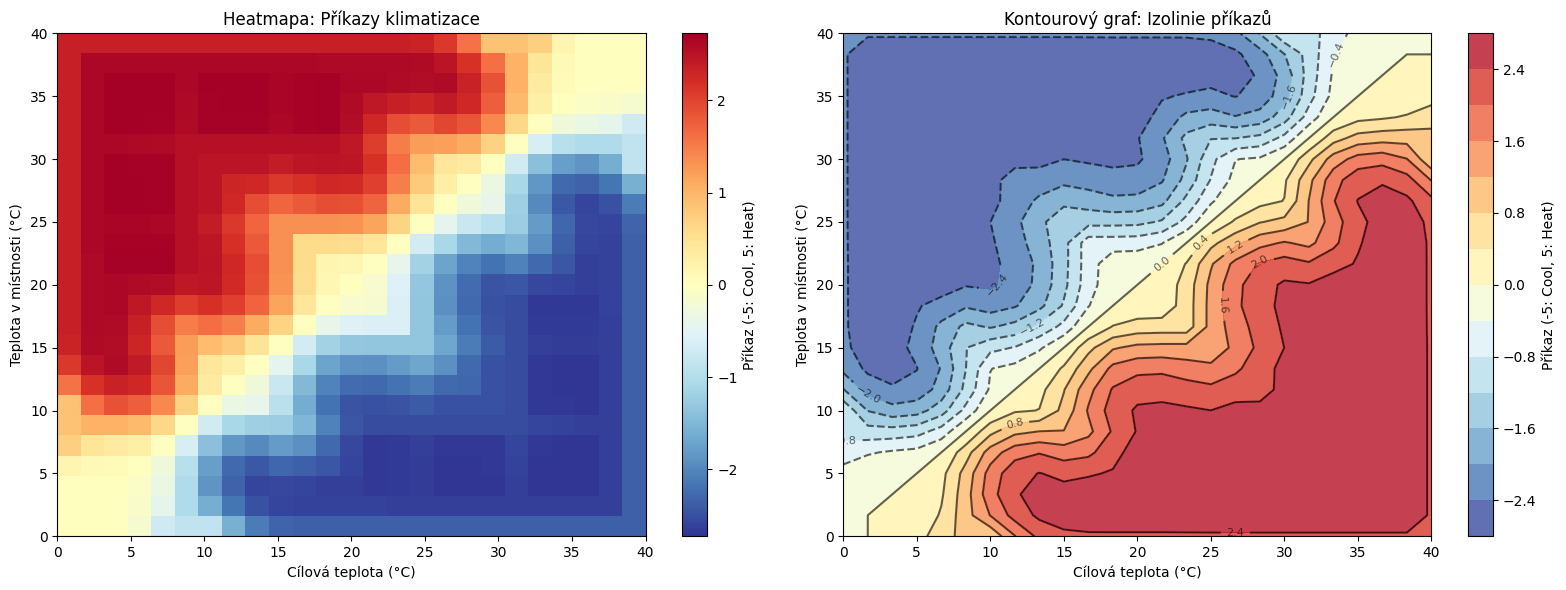

In [13]:
# Spuštění analýzy
analyze_model()


In [14]:
# Statistiky modelu
print("\n=== ANALÝZA MODELU ===")
print(f"Rozsah výstupních hodnot: {command_grid.min():.2f} až {command_grid.max():.2f}")
print(f"Průměrná hodnota: {command_grid.mean():.2f}")
print(f"Směrodatná odchylka: {command_grid.std():.2f}")

# Rozdělení výstupů
cool_points = np.sum(command_grid < -1)
no_change_points = np.sum(np.abs(command_grid) <= 1)
heat_points = np.sum(command_grid > 1)
total_points = command_grid.size

print(f"\nRozdělení příkazů:")
print(f"Cool (< -1): {cool_points} bodů ({100*cool_points/total_points:.1f}%)")
print(f"No Change (|x| ≤ 1): {no_change_points} bodů ({100*no_change_points/total_points:.1f}%)")
print(f"Heat (> 1): {heat_points} bodů ({100*heat_points/total_points:.1f}%)")



=== ANALÝZA MODELU ===
Rozsah výstupních hodnot: -2.73 až 2.73
Průměrná hodnota: -0.00
Směrodatná odchylka: 2.07

Rozdělení příkazů:
Cool (< -1): 246 bodů (39.4%)
No Change (|x| ≤ 1): 133 bodů (21.3%)
Heat (> 1): 246 bodů (39.4%)


### 7. Závěr

Model fuzzy logiky pro řízení klimatizace byl úspěšně implementován a testován.
Systém správně reaguje na různé kombinace vstupních teplot a poskytuje 
přiměřené příkazy pro klimatizační zařízení.

#### Klíčové vlastnosti modelu:
- **5 úrovní teploty**: very_cold, cold, warm, hot, very_hot
- **3 úrovně příkazů**: cool, no_change, heat  
- **25 fuzzy pravidel** pokrývajících všechny kombinace
- **Gaussovy příslušnostní funkce** pro plynulé přechody
- **Rozsah teplot**: 0-40°C
- **Rozsah příkazů**: -5 (max chlazení) až 5 (max ohřev)

#### Výhody fuzzy přístupu:
- Plynulé řízení bez skokových změn
- Robustnost vůči nejistotě v měření
- Intuitivní pravidla odpovídající lidskému uvažování
- Flexibilita při ladění systému